<h2 align="center">Retailers Churn Prediction for MaxAB</h2>

<img src="https://media-exp1.licdn.com/dms/image/C4E05AQG1PqVFSqFaqA/videocover-high/0/1648566596962?e=2147483647&v=beta&t=JT4cGY1kGVkhC4K-EnbQSasK5I8f8ye1TTY0T3GPBc0">

# Table of Contents :
* [***Loading and Cleaning Data***](#loadingdata)
* [***CLV Model***](#clv)
* [***Conclusion***](#c)
* [***Prediction***](#p)


# Loading and Cleaning Data<a class="anchor" id="loadingdata"></a>

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')
#Loading Data
df = pd.read_csv(r'Downloads\Retailers History.csv')
# cleaning Data
## drop rows that all null
df = df.dropna(how='all')
## fill null value in segment col with 'unknown'
df = df.fillna(value = 'unknown')
## rename ?column? col to id
df = df.rename(columns={'?column?':'id'})
## edit type of col
df[['id','order_count','cats_count','brands_count','sku_count']] = df[['id','order_count',
                                                                       'cats_count','brands_count','sku_count']].astype('int')
## oreder month col to datetime
df.order_month = pd.to_datetime(df.order_month)
# display data
display(df.head(10))
# summary statistics about data
display(df.describe())
print('***************************************************')
# Data information
display(df.info())
# dispaly Total Number of Retailers
print('***************************************************')
print("Total Number of Retailers --> {0}".format(df.id.nunique()))
print('***************************************************')
# display Date of First transication
print('Date of First transication')
display(df.order_month.min())
print('***************************************************')
# display Date of last transication
print('Date of last transication')
display(df.order_month.max())

,id,segment,order_month,order_count,cats_count,brands_count,sku_count,nmv_month
0,77,bulk,2021-02-01,2,4,5,9,2316.00
1,77,bulk,2021-03-01,2,3,6,13,4333.00
2,77,bulk,2021-04-01,1,2,3,3,2729.00
3,78,dairy,2019-06-01,3,13,19,46,19227.00
4,78,dairy,2019-07-01,2,10,16,25,6744.00
5,78,dairy,2019-08-01,1,4,6,22,6035.50
6,78,dairy,2019-09-01,1,7,8,8,2952.00
7,78,dairy,2019-10-01,2,7,9,18,4729.25
8,78,dairy,2019-11-01,2,6,9,21,6102.00
9,78,dairy,2019-12-01,6,21,38,79,22221.75


,id,order_count,cats_count,brands_count,sku_count,nmv_month
count,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000
mean,10660.636253,3.281496,11.803836,18.858827,40.028801,8994.551482
std,4824.091102,3.265145,9.119837,17.787896,44.715043,14732.504469
min,77.000000,1.000000,1.000000,1.000000,1.000000,-16400.250000
25%,7175.000000,1.000000,5.000000,6.000000,10.000000,1675.000000
50%,10754.000000,2.000000,9.000000,13.000000,24.000000,4010.645000
75%,14761.000000,4.000000,17.000000,26.000000,52.000000,10147.100000
max,18699.000000,36.000000,49.000000,132.000000,460.000000,474711.420000


***************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99998 entries, 0 to 99997
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            99998 non-null  int32         
 1   segment       99998 non-null  object        
 2   order_month   99998 non-null  datetime64[ns]
 3   order_count   99998 non-null  int32         
 4   cats_count    99998 non-null  int32         
 5   brands_count  99998 non-null  int32         
 6   sku_count     99998 non-null  int32         
 7   nmv_month     99998 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(5), object(1)
memory usage: 5.0+ MB


None

***************************************************
Total Number of Retailers --> 12784
***************************************************
Date of First transication


Timestamp('2018-11-01 00:00:00')

***************************************************
Date of last transication


Timestamp('2021-04-01 00:00:00')

# CLV (customer lifetime value)<a class="anchor" id="clv"></a>





<h3 align="center">Prepering Data</h3>


###  Frequency
***represents the number of repeat purchases the customer has made***

In [3]:
frequency = df.groupby('id')['id'].count()

### T 
***represents the age of the customer This is equal to the duration between a customer’s first purchase and the end of the period under study***


In [4]:
first_purchase = df.groupby('id')['order_month'].min()
end_of_period = df['order_month'].max()
T = (end_of_period - first_purchase) / np.timedelta64(1, 'M')

### Recency
***represents the age of the customer when they made their most recent purchases
This is equal to the duration between a customer’s first purchase and their latest purchase.***


In [5]:
first_purchase = df.groupby('id')['order_month'].min()
last_purchase = df.groupby('id')['order_month'].max()
recency = (last_purchase - first_purchase) / np.timedelta64(1, 'M')

### Monetary Value 
***represents the average value of a given customer’s purchases. This is equal to the sum of all a customer’s purchases divided by the total number of purchases***

In [6]:
overall_purchases = df.groupby('id')['nmv_month'].sum()
monetary_value = overall_purchases/frequency


<h3 align="center">Final Data</h3>

In [7]:
data = {'id':frequency.index,'frequency':frequency.values,'T':T.values,
        'recency':recency.values,'monetary_value':monetary_value.values}
summary = pd.DataFrame(data)
summary.head()

,id,frequency,T,recency,monetary_value
0,77,3,1.938438,1.938438,3126.000000
1,78,17,22.012772,19.055833,12225.891176
2,79,9,16.000329,16.000329,3337.319259
3,81,8,16.000329,14.061890,1514.225000
4,82,4,25.955358,14.948972,892.762500


<h3 align="center">Model training</h3>

In [8]:
from lifetimes import ModifiedBetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix

model = ModifiedBetaGeoFitter(penalizer_coef=0.001)
model.fit(summary['frequency'],summary['recency'],summary['T'])

<lifetimes.ModifiedBetaGeoFitter: fitted with 12784 subjects, a: 0.61, alpha: 5.80, b: 4.18, r: 4.55>

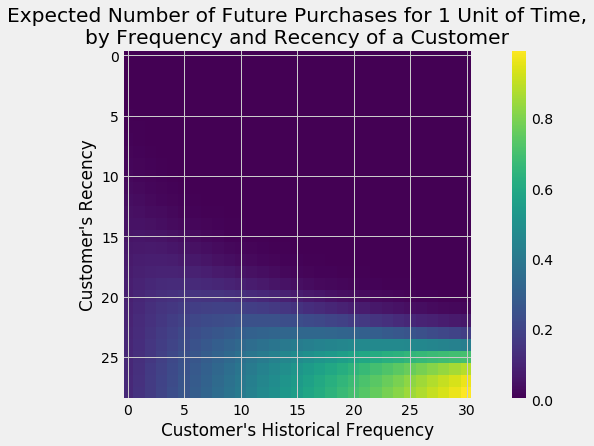

In [9]:
plt.figure(figsize=(12,6))
plot_frequency_recency_matrix(model)
plt.show()

**We can see that if a Retailers has bought 10 times from MaxAB, and their latest purchase was when they were 20 month old, then they are your best Retailers (bottom-right). Your coldest Retailers are those that are in the top-right corner: they bought a lot quickly, and we haven’t seen them in months.
There’s also that beautiful “tail” around (10,20). That represents the Retailers who buys infrequently, but we’ve seen him or her recently, so they might buy again - we’re not sure if they are dead or just between purchases.**

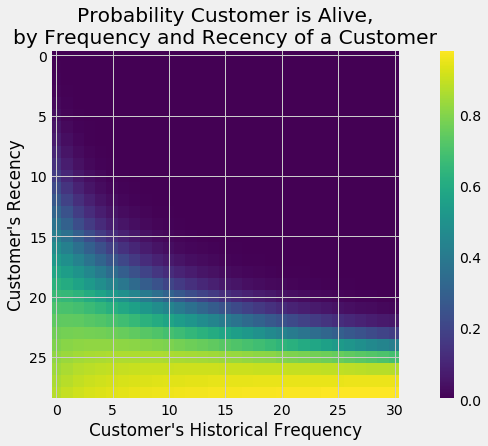

In [10]:
plt.figure(figsize=(12,6))
plot_probability_alive_matrix(model)
plt.show()

**Here We can see the Probability of Retailers of being alive mean that they still our Retailers so it shows that if a Retailers have bought more than one times from MaxAB, and their latest purchase was when they were 10 month old, then they are still consider our Retailers. Your dead Retailers mean that they were not consider our Retailers are those that are in the top-right corner: they bought a lot quickly, and we haven’t seen them in months.**

<h2 align="center">Conclusion</h2><a class="anchor" id="c"></a>

**So we can Conclude from the two graph that if Retailers have bought more than 10 times and there ages with us are more than 20 months so they have a high Probability to buy from us in the next month**

**One cons of this method that it does not take the recent retailers(that have a low age with us) into account and give them a low Probability of buying in the next month and this effect badly on our anaylsis so we should give a recent retailer who bought from us the last 3 months in raw a high Probability of buying next month**


<h2 align="center">Prediction</h2><a class="anchor" id="p"></a>

* ***predict the recent retailers who bought from us the last 3 months in raw***

In [11]:
april_retailers=set(df.groupby('order_month').get_group('2021-04-01').id.values)
march_retailers=set(df.groupby('order_month').get_group('2021-03-01').id.values)
feb_retailers=set(df.groupby('order_month').get_group('2021-02-01').id.values)
recent_retailers=set.intersection(april_retailers,march_retailers,feb_retailers)

* ***predict retailers whose bought more than 10 times and there ages with us are more than 20 months***

In [12]:
best_retailers = set(summary.query("frequency>10 and recency>20").id.values)

* ***Get the union of the two methods***

In [13]:
not_churn = set.union(recent_retailers,best_retailers)

* ***Final prediction***

In [14]:
churn = set(df.id.values).difference(not_churn)

In [15]:
not_churn = pd.DataFrame(not_churn).rename(columns={0:'id'})
churn = pd.DataFrame(churn).rename(columns={0:'id'})
not_churn['who will buy?'] = 1
churn['who will buy?'] = 0
submission = pd.concat([churn,not_churn]).sort_values('id',ignore_index=True)
submission.head()

,id,who will buy?
0,77,1
1,78,0
2,79,1
3,81,0
4,82,0


* ***who will buy? ==1  --> will buy next month***
* ***who will buy? ==0  --> won't buy next month***

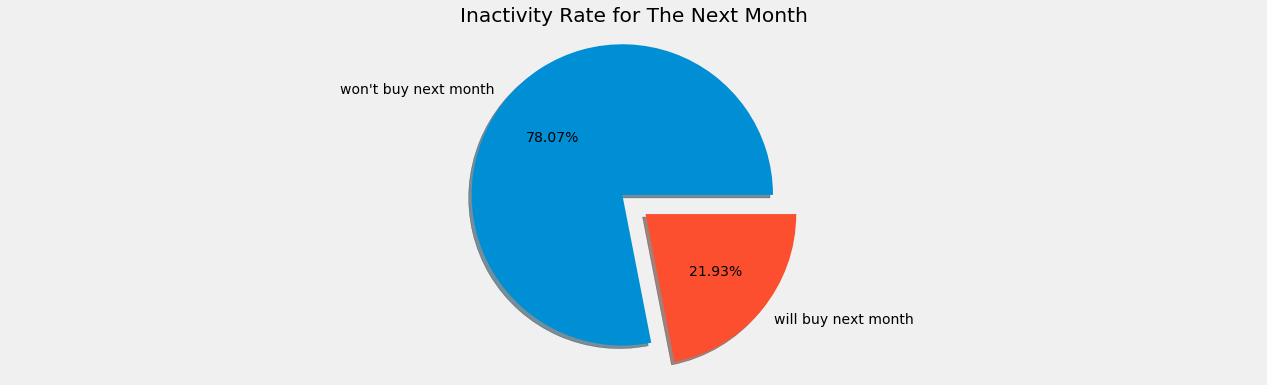

In [17]:
plt.figure(figsize=(20,6))
churn_rate = submission['who will buy?'].value_counts()
plt.pie(churn_rate,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=["won't buy next month","will buy next month"])
plt.title('Inactivity Rate for The Next Month')
plt.axis('equal')
plt.show()

* ***Saving prediction in Excel Format***

In [18]:
submission.to_csv('Omar_Mohamed_DSChallenge.csv',index=False)